In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing#因为iris有三类，只取两类

iris = load_iris()
X = iris.data[50:150,]#因为iris有三类，只取两类

le = preprocessing.LabelEncoder()#将花分类标签1、2改成0、1
#iris.target[50:150]
y = le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [3]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.33, random_state = 123)
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)#训练

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [4]:
#计算ROC Curve参数
probas_ = clf.fit(train_X, train_y).predict_proba(test_X)

#probas_#预测结果，几率值
probas_[:, 1]#选择后面的类别

array([ 0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  1.,  0.,  0.,  1.,  1.])

In [6]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])#测试的标签和预测的几率
#tpr
#fpr

In [ ]:
#画图
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
#求得AUC分数
from sklearn.metrics import auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.876838


In [10]:
#建立各种分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)#svc特殊
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

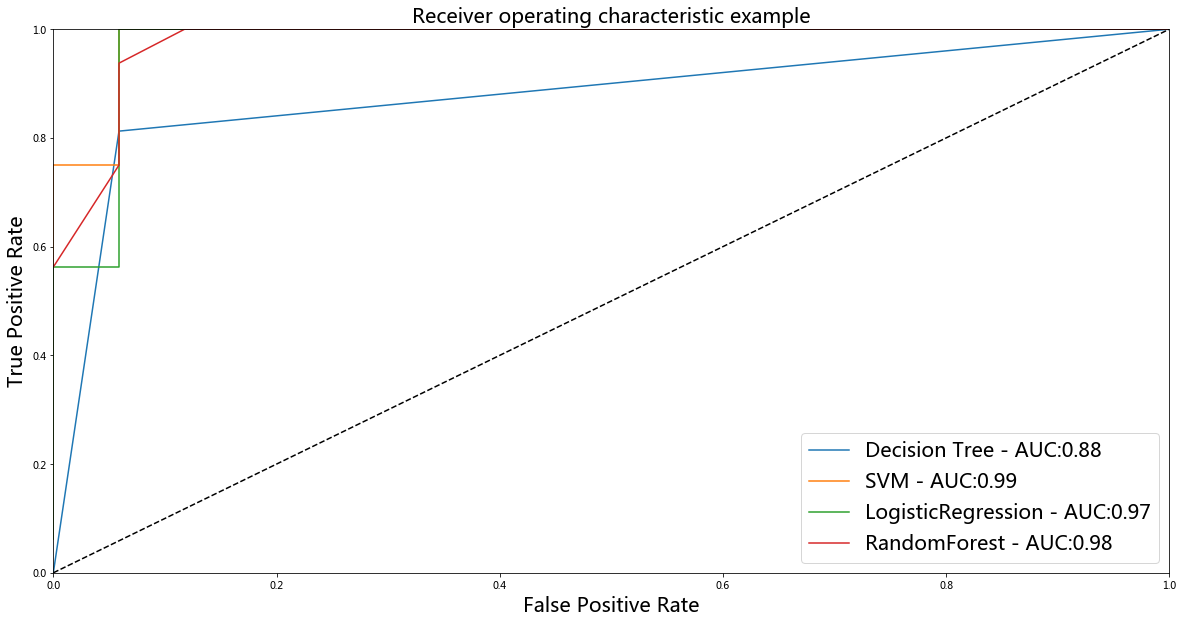

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()